In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset from a URL or local file
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx"
data = pd.read_excel(url)

# Display the first few rows of the dataset to understand its structure
print(data.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [2]:
from sklearn.linear_model import LinearRegression
# Check data types and generate descriptive statistics
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None
            Quantity                    InvoiceDate      UnitPrice  \
count  541909.000000                         541909  541909.000000   
mean        9.552250  2011-07-04 13:34:57.156386048       4.611114   
min    -80995.000000            2010-12-01 08:26:00  -11062.060000   
25%         1.000000   

In [3]:
# Check for missing values in the dataset
print(data.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [4]:
# Data cleaning steps
# Remove rows with missing CustomerID because CustomerID is crucial for our analysis
data.dropna(subset=['CustomerID'], inplace=True)
# Convert CustomerID from float to int
data['CustomerID'] = data['CustomerID'].astype(int)
print(data.isnull().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  int64         
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.9+ MB
None


In [6]:
# Removing duplicate entries
data.drop_duplicates(inplace=True)
print(data.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55       17850  United Kingdom  
1 2010-12-01 08:26:00       3.39       17850  United Kingdom  
2 2010-12-01 08:26:00       2.75       17850  United Kingdom  
3 2010-12-01 08:26:00       3.39       17850  United Kingdom  
4 2010-12-01 08:26:00       3.39       17850  United Kingdom  


In [7]:
# Removing rows where Quantity or UnitPrice might be less than zero
data = data[(data['Quantity'] > 0) & (data['UnitPrice'] > 0)]
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  int64         
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.0+ MB
None


In [8]:
# Calculate the total cost for each transaction
data['TotalCost'] = data['Quantity'] * data['UnitPrice']

# Check the cleaned dataset
print(data.describe())

            Quantity                    InvoiceDate      UnitPrice  \
count  392692.000000                         392692  392692.000000   
mean       13.119702  2011-07-10 19:13:07.771892480       3.125914   
min         1.000000            2010-12-01 08:26:00       0.001000   
25%         2.000000            2011-04-07 11:12:00       1.250000   
50%         6.000000            2011-07-31 12:02:00       1.950000   
75%        12.000000            2011-10-20 12:53:00       3.750000   
max     80995.000000            2011-12-09 12:50:00    8142.750000   
std       180.492832                            NaN      22.241836   

          CustomerID      TotalCost  
count  392692.000000  392692.000000  
mean    15287.843865      22.631500  
min     12346.000000       0.001000  
25%     13955.000000       4.950000  
50%     15150.000000      12.450000  
75%     16791.000000      19.800000  
max     18287.000000  168469.600000  
std      1713.539549     311.099224  


In [9]:
# Handle outliers in TotalCost
quantiles = data['TotalCost'].quantile([0.01, 0.99])
data = data[(data['TotalCost'] >= quantiles[0.01]) & (data['TotalCost'] <= quantiles[0.99])]

# Log transformation to handle skewness in data
data['LogTotalCost'] = np.log(data['TotalCost'] + 1)

<ipython-input-9-b17992129a3b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['LogTotalCost'] = np.log(data['TotalCost'] + 1)


In [10]:
print(data.describe())

            Quantity                    InvoiceDate      UnitPrice  \
count  385543.000000                         385543  385543.000000   
mean       10.752108  2011-07-10 11:25:36.024775424       2.932315   
min         1.000000            2010-12-01 08:26:00       0.040000   
25%         2.000000            2011-04-06 15:19:00       1.250000   
50%         6.000000            2011-07-29 15:40:00       1.950000   
75%        12.000000            2011-10-20 12:03:00       3.750000   
max      3186.000000            2011-12-09 12:50:00     195.000000   
std        22.619626                            NaN       3.861442   

          CustomerID      TotalCost   LogTotalCost  
count  385543.000000  385543.000000  385543.000000  
mean    15283.737544      17.432638       2.451538  
min     12347.000000       0.550000       0.438255  
25%     13950.000000       4.950000       1.783391  
50%     15150.000000      11.900000       2.557227  
75%     16788.000000      19.800000       3.034953 

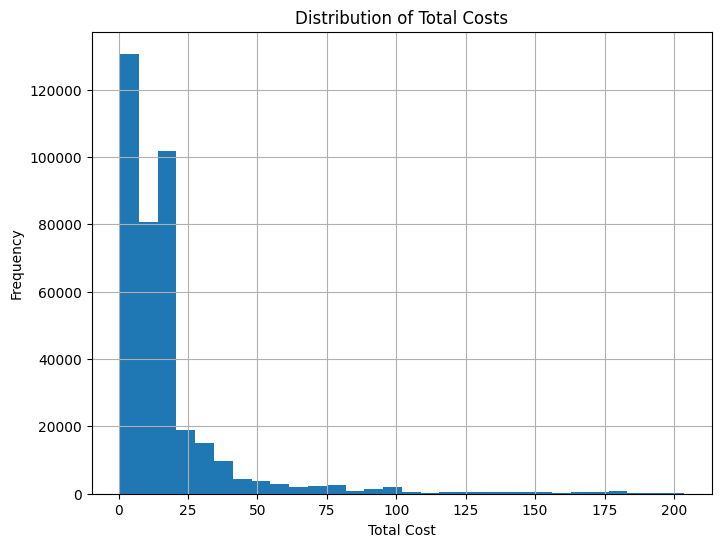

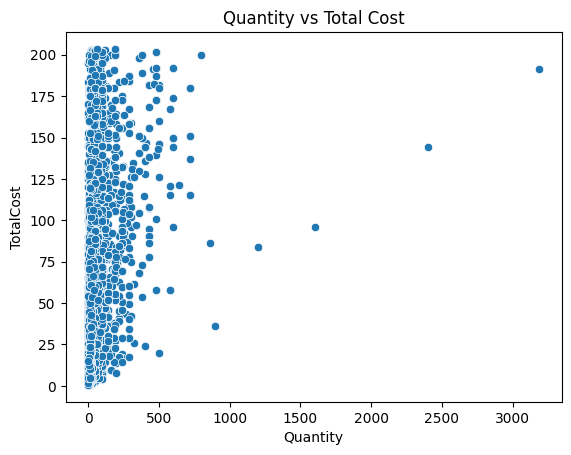

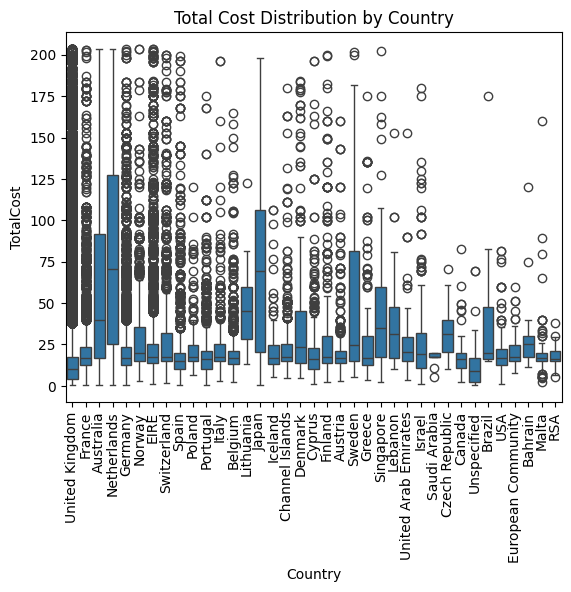

In [11]:
# Exploratory Data Analysis (EDA)
# Visualizing the distribution of Total Costs
plt.figure(figsize=(8, 6))
data['TotalCost'].hist(bins=30)
plt.title('Distribution of Total Costs')
plt.xlabel('Total Cost')
plt.ylabel('Frequency')
plt.show()

# Scatter plot for Total Cost vs Quantity
sns.scatterplot(x='Quantity', y='TotalCost', data=data)
plt.title('Quantity vs Total Cost')
plt.show()

# Boxplot for Total Cost by different Countries
sns.boxplot(x='Country', y='TotalCost', data=data)
plt.xticks(rotation=90)
plt.title('Total Cost Distribution by Country')
plt.show()



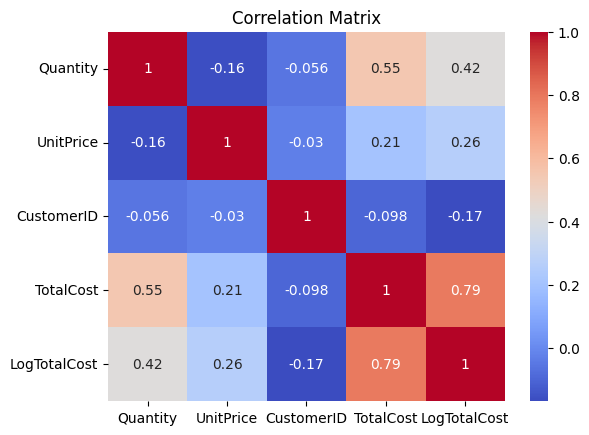

In [12]:
# Ensure the DataFrame only contains numeric columns for correlation analysis
numeric_data = data.select_dtypes(include=[np.number])  # This line selects only the numeric columns

# Now calculate the correlation matrix on the numeric data
corr = numeric_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [13]:
# Feature Engineering
data['AverageOrderValue'] = data['TotalCost'] / data['Quantity']
data['OrderFrequency'] = data.groupby('CustomerID')['InvoiceNo'].transform('nunique')
data['DaysSinceLastPurchase'] = (data['InvoiceDate'].max() - data.groupby('CustomerID')['InvoiceDate'].transform(max)).dt.days

# Preparing Data for Modeling
features = data[['AverageOrderValue', 'OrderFrequency', 'DaysSinceLastPurchase', 'LogTotalCost']]
target = data['TotalCost']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Model Building and Evaluation
# Linear Regression Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)

# RandomForest Model with reduced complexity
forest_model = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42)
forest_model.fit(X_train, y_train)
forest_predictions = forest_model.predict(X_test)



In [14]:
# Evaluate Linear Regression Model
linear_mse = mean_squared_error(y_test, linear_predictions)
linear_r2 = r2_score(y_test, linear_predictions)
print(f'Linear Regression - Mean Squared Error: {linear_mse}')
print(f'Linear Regression - R^2 Score: {linear_r2}')

# Evaluate Reduced Complexity RandomForest Model
forest_mse = mean_squared_error(y_test, forest_predictions)
forest_r2 = r2_score(y_test, forest_predictions)
print(f'Reduced RandomForest - Mean Squared Error: {forest_mse}')
print(f'Reduced RandomForest - R^2 Score: {forest_r2}')




Linear Regression - Mean Squared Error: 210.9288971943363
Linear Regression - R^2 Score: 0.6266101519105984
Reduced RandomForest - Mean Squared Error: 0.00015391976856660684
Reduced RandomForest - R^2 Score: 0.9999997275286613


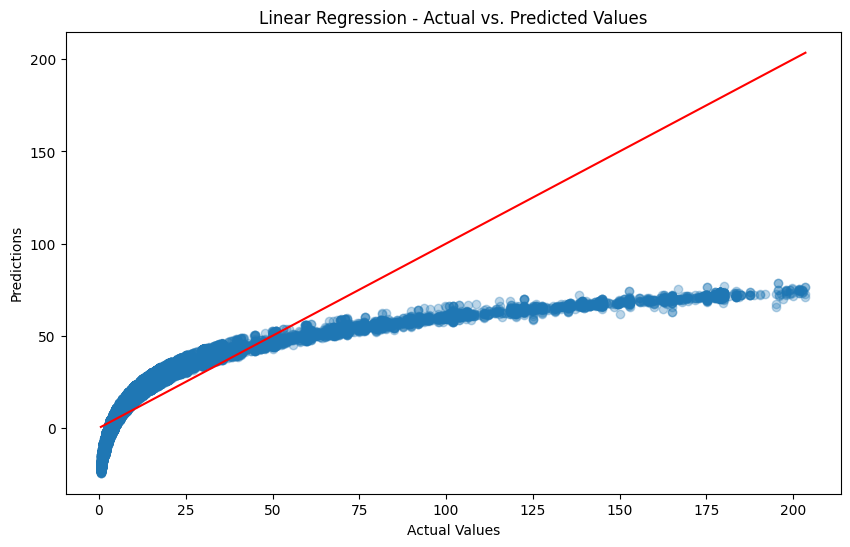

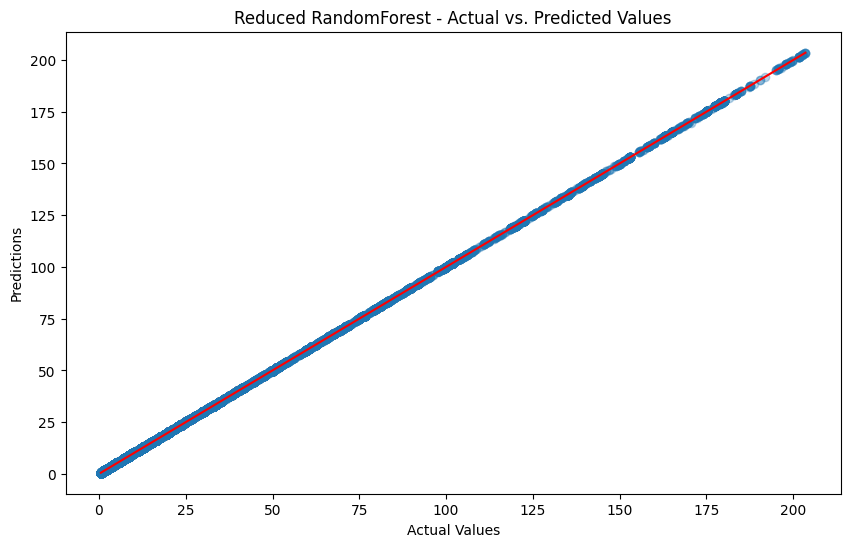

In [15]:
# Visualization of Actual vs Predicted Values for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test, linear_predictions, alpha=0.3)
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.title('Linear Regression - Actual vs. Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line for perfect prediction
plt.show()

# Visualization of Actual vs Predicted Values for RandomForest
plt.figure(figsize=(10, 6))
plt.scatter(y_test, forest_predictions, alpha=0.3)
plt.xlabel('Actual Values')
plt.ylabel('Predictions')
plt.title('Reduced RandomForest - Actual vs. Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Line for perfect prediction
plt.show()